In [1]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import glob
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
from scipy.linalg import toeplitz
from patsy import dmatrices
from math import sqrt
sns.set_style('white')

In [2]:
filename_2019 = glob.glob('../data/2019/*.csv')
filename_2019.sort()
filename_2019

['../data/2019/agm.csv',
 '../data/2019/alm.csv',
 '../data/2019/bum.csv',
 '../data/2019/cfm.csv',
 '../data/2019/cum.csv',
 '../data/2019/ebm.csv',
 '../data/2019/egm.csv',
 '../data/2019/hcm.csv',
 '../data/2019/im.csv',
 '../data/2019/jm.csv',
 '../data/2019/jmm.csv',
 '../data/2019/lm.csv',
 '../data/2019/mam.csv',
 '../data/2019/nim.csv',
 '../data/2019/oim.csv',
 '../data/2019/pbm.csv',
 '../data/2019/ppm.csv',
 '../data/2019/rbm.csv',
 '../data/2019/rum.csv',
 '../data/2019/smm.csv',
 '../data/2019/snm.csv',
 '../data/2019/srm.csv',
 '../data/2019/tam.csv',
 '../data/2019/vm.csv',
 '../data/2019/znm.csv']

In [3]:
X = 'cum'
Y = 'znm'

In [4]:
df = pd.read_csv(f'../data/2018/{X}.csv', index_col=0, encoding='gbk')
df.columns = ['code', 'time', 'open', 'high', 'low', f'{X}_close', f'{X}_volume', 'turnover', 'open interest']
df.rename_axis("type", axis='index', inplace=True)
df['time'] = pd.to_datetime(df['time'])


#df.set_index('time', inplace=True)
df.reset_index(inplace=True)
df

,type,code,time,open,high,low,cum_close,cum_volume,turnover,open interest
0,SC,cu1802,2018-01-02 09:01:00,55400.0,55550.0,55370.0,55430.0,3140.0,870263700.0,165070
1,SC,cu1802,2018-01-02 09:02:00,55440.0,55480.0,55390.0,55400.0,1572.0,435747000.0,164880
2,SC,cu1802,2018-01-02 09:03:00,55400.0,55420.0,55360.0,55380.0,640.0,177243900.0,164798
3,SC,cu1802,2018-01-02 09:04:00,55380.0,55420.0,55370.0,55370.0,716.0,198312600.0,164722
4,SC,cu1802,2018-01-02 09:05:00,55370.0,55420.0,55360.0,55420.0,1108.0,306852900.0,164728
...,...,...,...,...,...,...,...,...,...,...
111310,SC,cu1902,2018-12-28 14:56:00,48310.0,48320.0,48300.0,48310.0,936.0,226085400.0,151434
111311,SC,cu1902,2018-12-28 14:57:00,48310.0,48330.0,48300.0,48320.0,750.0,181175100.0,151390
111312,SC,cu1902,2018-12-28 14:58:00,48320.0,48320.0,48300.0,48300.0,504.0,121736300.0,150994
111313,SC,cu1902,2018-12-28 14:59:00,48300.0,48320.0,48300.0,48320.0,652.0,157494500.0,150628


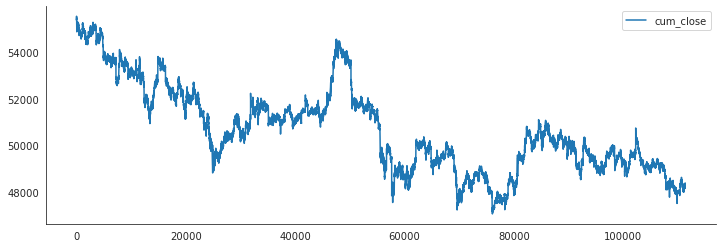

In [5]:
df[[f'{X}_close']].plot(grid=False, figsize=(12,4))
sns.despine()

In [6]:
df_other = pd.read_csv(f'../data/2018/{Y}.csv', index_col=0, encoding='gbk')
df_other.columns = ['code', 'time', 'open', 'high', 'low', f'{Y}_close', f'{Y}_volume', 'turnover', 'open interest']
df_other.rename_axis("type", axis='index', inplace=True)
df_other['time'] = pd.to_datetime(df_other['time'])

#df_other.set_index('time', inplace=True)
df_other.reset_index(inplace=True)

df_other

,type,code,time,open,high,low,znm_close,znm_volume,turnover,open interest
0,SC,zn1802,2018-01-02 09:01:00,25820.0,25845.0,25730.0,25785.0,6512.0,839810000.0,173916
1,SC,zn1802,2018-01-02 09:02:00,25780.0,25800.0,25750.0,25750.0,2358.0,303958600.0,173816
2,SC,zn1802,2018-01-02 09:03:00,25750.0,25760.0,25720.0,25755.0,1906.0,245335200.0,173422
3,SC,zn1802,2018-01-02 09:04:00,25755.0,25755.0,25725.0,25725.0,1256.0,161654200.0,173240
4,SC,zn1802,2018-01-02 09:05:00,25730.0,25790.0,25730.0,25785.0,1722.0,221811950.0,173452
...,...,...,...,...,...,...,...,...,...,...
111310,SC,zn1902,2018-12-28 14:56:00,20900.0,20920.0,20895.0,20915.0,2614.0,273282250.0,170254
111311,SC,zn1902,2018-12-28 14:57:00,20915.0,20935.0,20910.0,20935.0,1866.0,195214500.0,170064
111312,SC,zn1902,2018-12-28 14:58:00,20930.0,20935.0,20905.0,20910.0,2092.0,218839900.0,169458
111313,SC,zn1902,2018-12-28 14:59:00,20905.0,20920.0,20900.0,20920.0,1558.0,162897650.0,168990


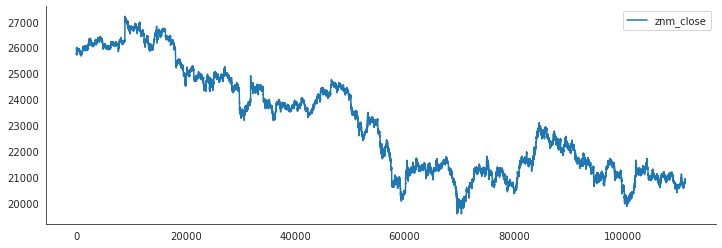

In [7]:
df_other[[f'{Y}_close']].plot(grid=False, figsize=(12,4))
sns.despine()

In [8]:
# df = df[[f'{X}_close', f'{X}_volume']]

irrelevant_col = ['code', 'open', 'high', 'low', 'turnover', 'open interest']
df.drop(columns=irrelevant_col, inplace = True)
    
df[f'{Y}_close'] = df_other.loc[:, f'{Y}_close'].copy()
df[f'{Y}_volume'] = df_other.loc[:, f'{Y}_volume'].copy()

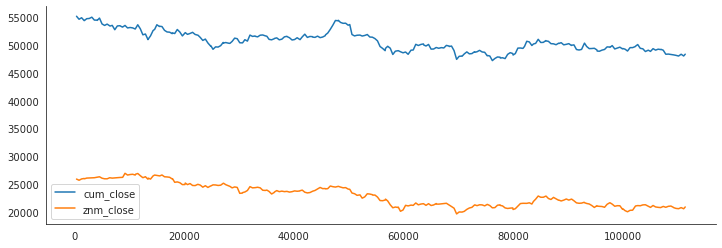

In [9]:
df['date'] = df['time'].dt.date

df['date_after'] = df['date'].shift(-1)
df["daily_close"] = (df["date_after"] != df["date"])
df_day = df.loc[df["daily_close"] ].copy()
df_day[[f'{X}_close',f'{Y}_close']].plot(grid=False, figsize=(12,4))
sns.despine()
#df_day.set_index('date', inplace=True)
df_day.reset_index(inplace=True)

In [10]:
df_day[f'{X}_log_ret'] = np.log(df_day[f'{X}_close']/df_day[f'{X}_close'].shift(1))
df_day[f'{Y}_log_ret'] = np.log(df_day[f'{Y}_close']/df_day[f'{Y}_close'].shift(1))

In [11]:
df_day

,index,type,time,cum_close,cum_volume,znm_close,znm_volume,date,date_after,daily_close,cum_log_ret,znm_log_ret
0,403,SC,2018-01-02 23:59:00,55150.0,4.0,25930.0,18.0,2018-01-02,2018-01-03,True,NaN,NaN
1,868,SC,2018-01-03 23:59:00,54610.0,30.0,25715.0,316.0,2018-01-03,2018-01-04,True,-0.009840,-0.008326
2,1333,SC,2018-01-04 23:59:00,54880.0,84.0,25955.0,78.0,2018-01-04,2018-01-05,True,0.004932,0.009290
3,1798,SC,2018-01-05 23:59:00,54370.0,58.0,26035.0,212.0,2018-01-05,2018-01-06,True,-0.009336,0.003078
4,1859,SC,2018-01-06 01:00:00,54390.0,164.0,25980.0,508.0,2018-01-06,2018-01-08,True,0.000368,-0.002115
...,...,...,...,...,...,...,...,...,...,...,...,...
282,109633,SC,2018-12-24 23:59:00,48130.0,214.0,20665.0,352.0,2018-12-24,2018-12-25,True,-0.001661,-0.006031
283,110098,SC,2018-12-25 23:59:00,48010.0,16.0,20610.0,1088.0,2018-12-25,2018-12-26,True,-0.002496,-0.002665
284,110563,SC,2018-12-26 23:59:00,48330.0,178.0,20805.0,198.0,2018-12-26,2018-12-27,True,0.006643,0.009417
285,111028,SC,2018-12-27 23:59:00,48020.0,52.0,20600.0,456.0,2018-12-27,2018-12-28,True,-0.006435,-0.009902


In [12]:
def calculate_hull_moving_average(df, period, close):

    df['window_t_ewm'] = df[close].ewm(span=period).mean()
    df['window_half_ewm'] = df[close].ewm(span=period/2).mean()
    df['diff']=df['window_half_ewm'] * 2 - df['window_t_ewm']
    
    df[f'hma{period}_{close}']=df['diff'].ewm(span=int(math.sqrt(period))).mean()
    
    irrelevant_col = ['window_t_ewm', 'window_half_ewm', 'diff']
    df.drop(columns=irrelevant_col, inplace = True)
    

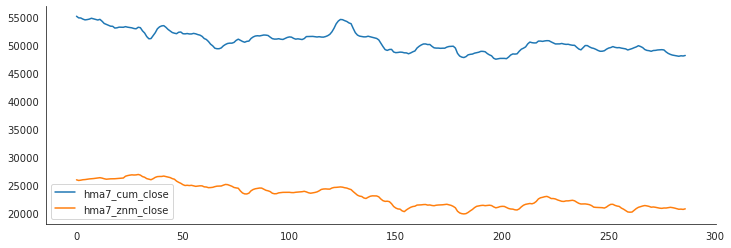

In [13]:
calculate_hull_moving_average(df_day, 7, f'{X}_close')
calculate_hull_moving_average(df_day, 7, f'{Y}_close')
df_day[[f'hma7_{X}_close',f'hma7_{Y}_close']].plot(grid=False, figsize=(12,4))
sns.despine()

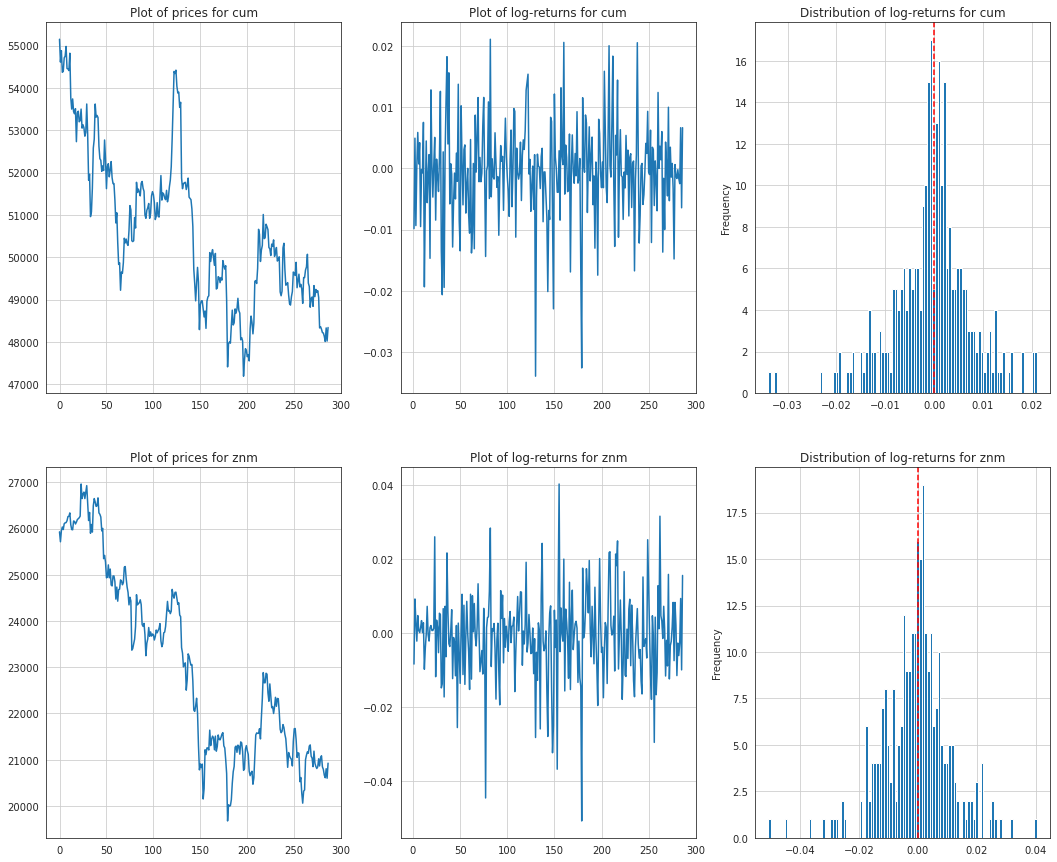

In [14]:
fig, axs = plt.subplots(2, 3, figsize=(18, 15))
df_day[f'{X}_close'].plot(ax=axs[0, 0], title=f'Plot of prices for {X}', grid=True)
df_day[f'{X}_log_ret'].plot(ax=axs[0, 1], title=f'Plot of log-returns for {X}', grid=True)
df_day[f'{X}_log_ret'].plot(kind='hist', bins=100, ax=axs[0, 2], title=f'Distribution of log-returns for {X}', grid=True)
axs[0, 2].axvline(df_day[f'{X}_log_ret'].median(), color='red', linestyle='--')

df_day[f'{Y}_close'].plot( ax=axs[1, 0], title=f'Plot of prices for {Y}', grid=True)
df_day[f'{Y}_log_ret'].plot(ax=axs[1, 1], grid=True, title=f'Plot of log-returns for {Y}',)
df_day[f'{Y}_log_ret'].plot(kind='hist', bins=100, ax=axs[1, 2], grid=True, title=f'Distribution of log-returns for {Y}',);
axs[1, 2].axvline(df_day[f'{Y}_log_ret'].median(), color='red', linestyle='--');

In [15]:
long_leg = f'{X}_log_ret'
short_leg = f'{Y}_log_ret'
df_spreads = pd.DataFrame()

for rolling_period in range(1, 51):
    df_spreads[rolling_period] = df_day[long_leg].rolling(rolling_period).sum() - df_day[short_leg].rolling(rolling_period).sum()

In [16]:
df_spread_stats = df_spreads.describe([x/10 for x in range(1,10)] + [0.005, 0.995])

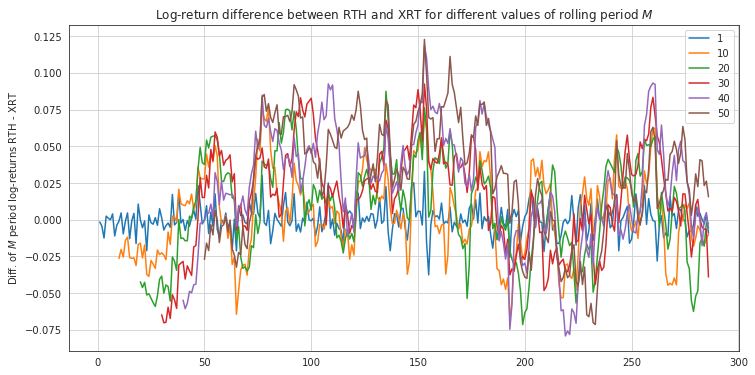

In [17]:
df_spreads[[1, 10, 20, 30, 40, 50]].plot(figsize=(12, 6), grid=True, 
                                         ylabel='Diff. of $M$ period log-returns RTH - XRT',
                                         title='Log-return difference between RTH and XRT for different values of rolling period $M$');